## Import libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load dataset

In [33]:
df = pd.read_csv(r"../data/Boston-house-price-data.csv")
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [34]:
df.shape

(506, 14)

In [24]:
df.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Missing Values check

In [27]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
# Missing values percentage

(df.isnull().sum()/len(df)) * 100   # len(df) = 506

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

In [45]:
# Summarizing the stats of the data

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Exploratory Data Analysis

In [46]:
# correlation matrix

df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


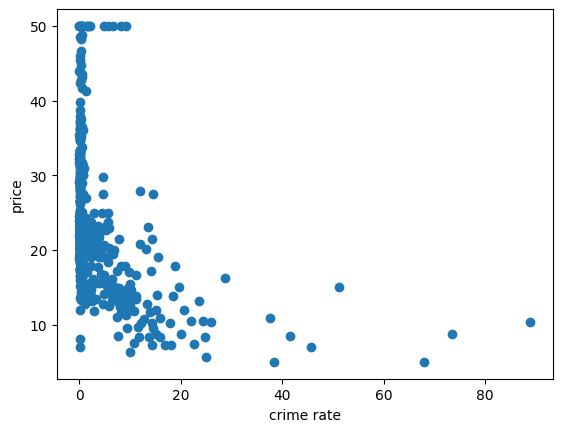

In [48]:
plt.scatter(df['CRIM'], df['MEDV'])
plt.xlabel("crime rate")
plt.ylabel("price")
plt.show()

Text(0, 0.5, 'price')

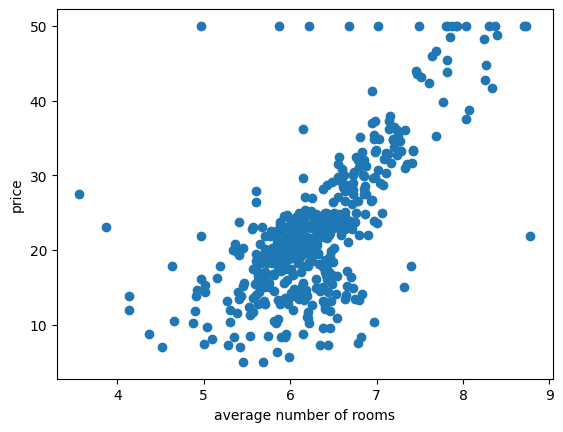

In [49]:
plt.scatter(df["RM"], df["MEDV"])
plt.xlabel("average number of rooms")
plt.ylabel("price")

<Axes: xlabel='RM', ylabel='MEDV'>

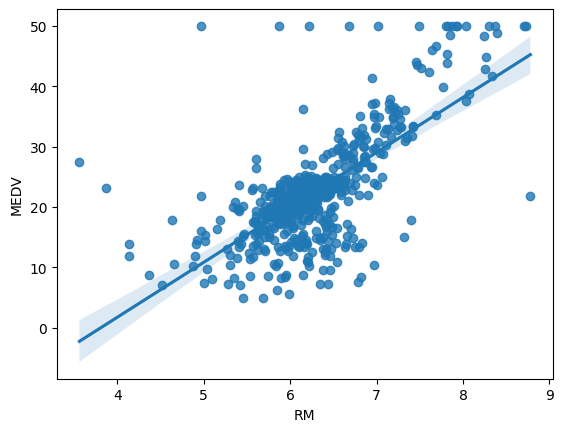

In [52]:
sns.regplot(x = 'RM', y = "MEDV", data = df)

<Axes: xlabel='LSTAT', ylabel='MEDV'>

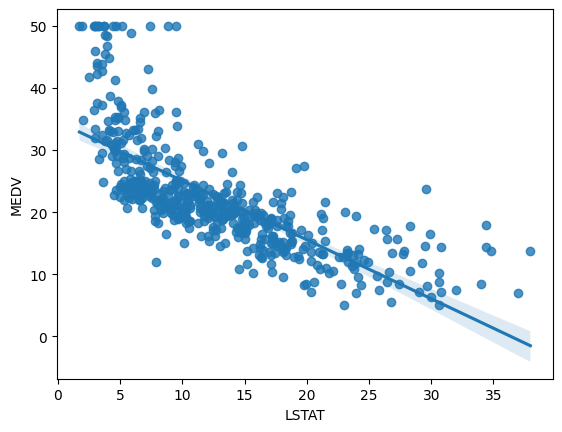

In [54]:
sns.regplot(x = "LSTAT", y = "MEDV", data = df)

# EDA Summary - Boston House Price Prediction

## 1. Dataset Overview
- **Total Samples**: 506
- **Total Features**: 13 + 1 Target Variable (MEDV)
- **Data Quality**: 100% complete dataset with **zero missing values**.

## 2. Key Statistical Findings
- **Target Variable (MEDV)**: Represents the median value of owner-occupied homes in .
- **Feature Distribution**: The dataset contains a mix of categorical (e.g., CHAS) and continuous variables (e.g., CRIM, RM, LSTAT).

## 3. Correlation Analysis
The analysis revealed strong relationships between several features and the target price:

| Feature | Correlation with Price (MEDV) | Impact |
| :--- | :--- | :--- |
| **RM** (Rooms) | **Strong Positive** | More rooms significantly increase house value. |
| **LSTAT** (Lower Status) | **Strong Negative** | Higher percentage of lower-status population correlates with lower prices. |
| **CRIM** (Crime Rate) | **Negative** | Higher crime rates generally lead to lower property values. |

## 4. Multicollinearity Analysis 
A significant level of multicollinearity was detected among the independent variables.

### Highly Correlated Feature Pairs (|r| > 0.7):
- **RAD & TAX (0.91)**: Extremely high correlation between highway accessibility and property tax rates.
- **NOX & DIS (-0.77)**: Strong inverse relationship between nitrogen oxide concentration and distance to employment centers.
- **NOX & INDUS (0.76)**: Industrial areas are heavily linked with higher pollution levels.
- **AGE & DIS (-0.75)**: Older buildings are typically closer to employment centers.
- **NOX & AGE (0.73)**: Older areas tend to have higher pollution levels.
- **TAX & INDUS (0.72)**: Industrial zones are associated with higher tax rates.

### Implications for Modeling:
- **Redundancy**: Some features carry nearly identical information.
- **Instability**: High multicollinearity can make regression coefficients unstable.
- **Strategy**: Consider **Feature Selection**, **PCA**, or **Regularization (Ridge/Lasso)**.